In [34]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if "Processed Data" in dirname:
            print(os.path.join(dirname, filename))

In [35]:
df=pd.DataFrame()
# for no in range(10,29):
for no in range(10,13):
    temp=pd.read_csv("/Users/joanapereira/Library/CloudStorage/OneDrive-UniversidadedoPorto/EngIA/1ano/1semestre/1parte/kaggle/Processed Data/fileID"+str(no)+"_ProcessedTripData.csv",header= None)
    # df=df.append(temp)
    df = pd.concat([df, temp])

In [36]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.022,0.000,0,0.0,0.0,0.0,0.051337,-0.000000,0,3,0,2,6,0,9,5,3
1,0.033,0.000,0,0.0,0.0,0.0,0.052761,-0.000000,0,3,0,2,6,0,9,5,3
2,0.038,0.000,0,0.0,0.0,0.0,0.054212,-0.000000,0,3,0,2,6,0,9,5,3
3,0.048,0.000,0,0.0,0.0,0.0,0.055728,-0.000000,0,3,0,2,6,0,9,5,3
4,0.058,0.000,0,0.0,0.0,0.0,0.057125,-0.000000,0,3,0,2,6,0,9,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30058,334.770,32.338,0,0.0,0.0,0.0,0.000000,-0.016169,1,3,0,4,5,0,10,6,3
30059,334.780,32.337,0,0.0,0.0,0.0,0.000000,-0.016168,1,3,0,4,5,0,10,6,3
30060,334.800,32.339,0,0.0,0.0,0.0,0.000000,-0.016170,1,3,0,4,5,0,10,6,3
30061,334.810,32.342,0,0.0,0.0,0.0,0.000000,-0.016171,1,3,0,4,5,0,10,6,3


Data Labelling and Identification

In [37]:
df.columns=['Time','Vehicle Speed','SHIFT','Engine Load','Total Acceleration','Engine RPM','Pitch','Lateral Acceleration','Passenger Count','Car Load','AC Status','Window Opening','Radio Volume','Rain Intensity','Visibility','Driver Wellbeing','Driver Rush']

Deleting Unncessary Features

In [38]:
# df=df.drop(['Time','Engine Load','Total Acceleration','Pitch','Lateral Acceleration','Passenger Count','Car Load','AC Status','Window Opening','Radio Volume','Rain Intensity','Visibility','Driver Wellbeing','Driver Rush'],axis=1)

Deleting Rows where the Gear is in Neutral Position

In [39]:
newdf = df[df.SHIFT != 0]
newdf = newdf.reset_index(drop=True)
df=newdf

In [40]:
df.describe()

,Time,Vehicle Speed,SHIFT,Engine Load,Total Acceleration,Engine RPM,Pitch,Lateral Acceleration,Passenger Count,Car Load,AC Status,Window Opening,Radio Volume,Rain Intensity,Visibility,Driver Wellbeing,Driver Rush
count,181494.000000,181494.000000,181494.000000,181494.000000,181494.000000,181494.000000,181494.000000,181494.000000,181494.000000,181494.0,181494.000000,181494.000000,181494.000000,181494.000000,181494.000000,181494.000000,181494.000000
mean,1018.436003,9.313908,2.742350,10.316581,0.302712,1947.175193,1.129715,-0.027301,0.078295,3.0,0.035582,1.326380,5.238950,0.423909,9.552988,5.078295,2.525307
std,678.519033,3.663965,0.944463,8.646934,0.884435,551.258023,2.279968,0.630295,0.268635,0.0,0.185247,1.636665,2.430917,0.494178,0.497186,0.268635,0.499361
min,23.388000,1.359300,1.000000,2.781200,-3.253600,800.600000,-10.549000,-4.247300,0.000000,3.0,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,2.000000
25%,328.082500,6.681900,2.000000,4.136825,-0.246785,1588.900000,0.348580,-0.139978,0.000000,3.0,0.000000,0.000000,3.000000,0.000000,9.000000,5.000000,2.000000
50%,1071.600000,9.216100,3.000000,7.406600,0.178650,1836.800000,1.212700,-0.010011,0.000000,3.0,0.000000,0.000000,6.000000,0.000000,10.000000,5.000000,3.000000
75%,1588.800000,11.686000,3.000000,13.363000,0.788617,2240.800000,2.170300,0.090904,0.000000,3.0,0.000000,2.000000,7.000000,1.000000,10.000000,5.000000,3.000000
max,2405.800000,26.451000,5.000000,67.595000,4.043900,5680.800000,11.576000,4.585800,1.000000,3.0,1.000000,4.000000,8.000000,1.000000,10.000000,6.000000,3.000000


Scatter Plot Analysis

In [57]:
# This code is from kaggle

# import matplotlib.pyplot as plt
# count=1
# x="Vehicle Speed"
# y="Engine RPM"
# colors=['red','green','blue','brown','black','yellow','orange']
#
# for i in range(1,6):
#     plt.scatter(df[x][df.SHIFT==i],df[y][df.SHIFT==i],c=colors[i],label=i,alpha=0.8)
#
# plt.gca().update(dict(title='SCATTER', xlabel=x, ylabel=y,))
# plt.legend(title='GEAR')
# plt.show()

Transfering the label feature towards the end.

In [42]:
# so label each column

temp=df.SHIFT
df=df.drop("SHIFT",axis=1)
df.insert(len(df.columns),"SHIFT",temp)
df

,Time,Vehicle Speed,Engine Load,Total Acceleration,Engine RPM,Pitch,Lateral Acceleration,Passenger Count,Car Load,AC Status,Window Opening,Radio Volume,Rain Intensity,Visibility,Driver Wellbeing,Driver Rush,SHIFT
0,60.569,2.7742,7.8434,-0.17278,1306.5,-1.6249,1.599300,0,3,0,2,6,0,9,5,3,1
1,60.579,2.7681,7.8260,-0.19490,1308.8,-1.6419,1.598600,0,3,0,2,6,0,9,5,3,1
2,60.589,2.7610,7.8087,-0.21415,1311.1,-1.6589,1.594500,0,3,0,2,6,0,9,5,3,1
3,60.599,2.7528,7.7913,-0.23072,1313.6,-1.6761,1.567700,0,3,0,2,6,0,9,5,3,1
4,60.608,2.7481,7.7739,-0.24485,1316.1,-1.6932,1.565000,0,3,0,2,6,0,9,5,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181489,284.510,6.1452,4.0812,0.36177,1739.6,5.7453,-0.021508,1,3,0,4,5,0,10,6,3,2
181490,284.520,6.1445,4.0750,0.36277,1737.9,5.7995,0.058373,1,3,0,4,5,0,10,6,3,2
181491,284.530,6.1389,4.0687,0.36433,1736.2,5.8537,0.058320,1,3,0,4,5,0,10,6,3,2
181492,284.540,6.1328,4.0625,0.36647,1734.4,5.9080,0.064394,1,3,0,4,5,0,10,6,3,2


In [44]:
# I think, we can skip this, we already are doing too much
# from sklearn.preprocessing import MinMaxScaler
#
# scaler = MinMaxScaler()
# X_normalized = scaler.fit_transform(df)
#
# X_normalized

array([[0.01560645, 0.05638916, 0.07810374, ..., 0.        , 1.        ,
        0.        ],
       [0.01561065, 0.05614606, 0.07783528, ..., 0.        , 1.        ,
        0.        ],
       [0.01561485, 0.05586309, 0.07756836, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.10961244, 0.1904853 , 0.0198646 , ..., 1.        , 1.        ,
        0.25      ],
       [0.10961664, 0.19024219, 0.01976894, ..., 1.        , 1.        ,
        0.25      ],
       [0.10962084, 0.19003495, 0.01967328, ..., 1.        , 1.        ,
        0.25      ]])

In [45]:
# Feature Importance
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df.dropna(inplace=True)

# Convert categorical variables to numerical
label_encoder = LabelEncoder()
df['SHIFT_encoded'] = label_encoder.fit_transform(df['SHIFT'])

X = df.drop(columns=['SHIFT', 'SHIFT_encoded'])
y = df['SHIFT_encoded']

# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

# Get feature importances
feature_importances = clf.feature_importances_
feature_names = X.columns

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

most_important_features_df = feature_importance_df[feature_importance_df['Importance'] > 0.35]

# Sort features by importance in descending order
most_important_features_df = most_important_features_df.sort_values(by='Importance', ascending=False)

# Print or visualize the most important features
print(most_important_features_df)

         Feature  Importance
1  Vehicle Speed    0.547033
4     Engine RPM    0.393048


In [ ]:
# Now lets create the df with only_most_important_features_df
only_most_important_features_df = most_important_features_df['Feature'].tolist()

# Create a new DataFrame with only the selected features from the original DataFrame
selected_df = X[only_most_important_features_df].copy()

                          Time  Vehicle Speed  Engine Load  \
Time                  1.000000      -0.128297     0.063967   
Vehicle Speed        -0.128297       1.000000     0.197567   
Engine Load           0.063967       0.197567     1.000000   
Total Acceleration    0.101989      -0.154401     0.776344   
Engine RPM            0.117419       0.440623     0.721825   
Pitch                 0.188789      -0.068472     0.321995   
Lateral Acceleration  0.015200      -0.025907    -0.008578   
Passenger Count      -0.368484       0.034195    -0.029371   
Car Load                   NaN            NaN          NaN   
AC Status             0.075301      -0.109363     0.036470   
Window Opening       -0.703317       0.006786    -0.063720   
Radio Volume          0.440639      -0.199862     0.019629   
Rain Intensity        0.150654       0.171714     0.073712   
Visibility           -0.086753      -0.172791    -0.073472   
Driver Wellbeing     -0.368484       0.034195    -0.029371   
Driver R

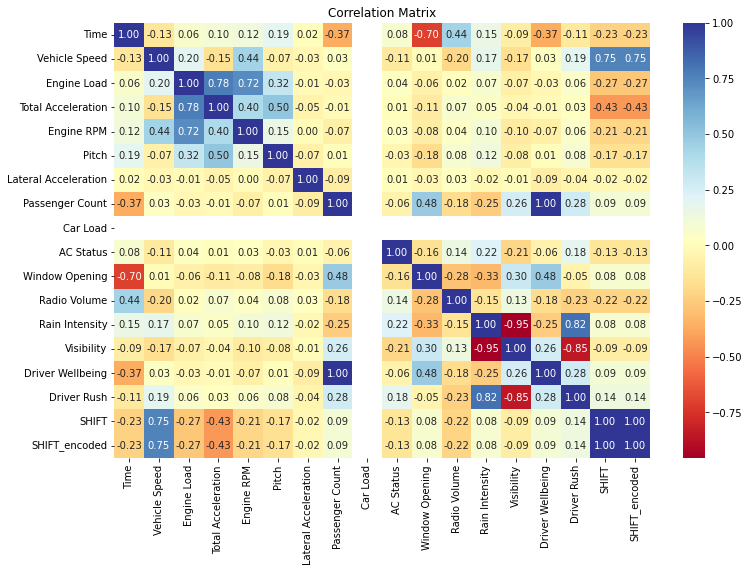

In [58]:
# Correlation matrix
df.dropna(inplace=True)
correlation_matrix = df.corr()

print(correlation_matrix)

# Correlation matrix = heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
heat = sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

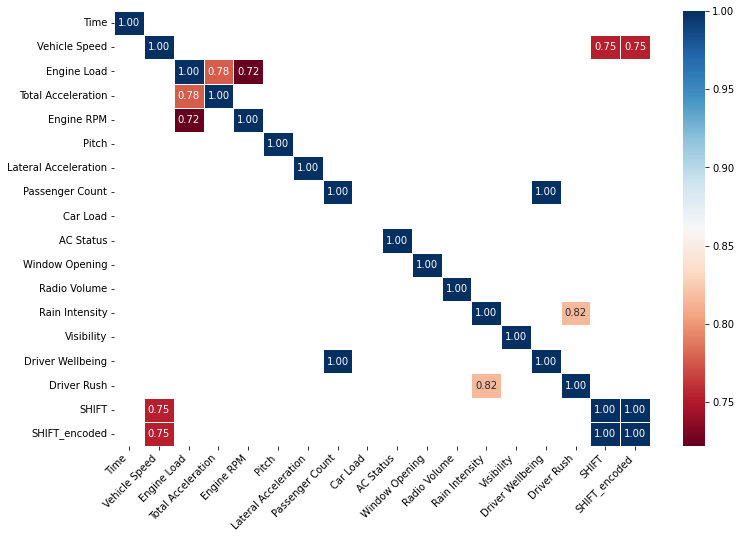

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

threshold = 0.65
filtered_data = np.where(correlation_matrix > threshold, correlation_matrix, np.nan)

filtered_df = pd.DataFrame(filtered_data, index=correlation_matrix.index, columns=correlation_matrix.columns)

plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(filtered_df, cmap='RdBu', annot=True, fmt=".2f", linewidths=.5, annot_kws={"size": 10})
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()


In [64]:
# DecisionTreeClassifier in scikit-learn implements the CART (Classification and Regression Trees) algorithm

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

df.dropna(inplace=True)
X = df[df.columns[:-1]]
y = df.SHIFT

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameters and values to search
# This aims to find the best set of hyperparameters for your machine learning model.
# Grid Search, which exhaustively evaluates all combinations of hyperparameters
param_grid = {
    'max_depth': [5, 7, 9],                  # Depth of the tree
    'min_samples_split': [3, 7, 10],         # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 4, 6]            # Minimum number of samples required to be at a leaf node
}

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
clf.fit(X_train, y_train)

# Predictions
predictions = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

# Perform Grid Search Cross-Validation to find the best parameters
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters found by Grid Search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_clf = DecisionTreeClassifier(random_state=42, **best_params)
best_clf.fit(X_train, y_train)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(best_clf, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3468
           2       1.00      1.00      1.00     11213
           3       1.00      1.00      1.00     13690
           4       1.00      1.00      1.00      7235
           5       1.00      1.00      1.00       693

    accuracy                           1.00     36299
   macro avg       1.00      1.00      1.00     36299
weighted avg       1.00      1.00      1.00     36299

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 3}
Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean CV Score: 1.0


In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Decision Tree Classifier with the best hyperparameters that were provided before
best_clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=1, min_samples_split=2, random_state=42)

# Train the model on the data set that still needs to only have the features we want
best_clf.fit(X, y)

predictions = best_clf.predict(X)

# # Calculate accuracy
# accuracy = accuracy_score(y, predictions)
# print("Accuracy:", accuracy)
#
# # Generate a classification report
# print("Classification Report:")
# print(classification_report(y, predictions))


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     16704
           2       1.00      1.00      1.00     56757
           3       1.00      1.00      1.00     68113
           4       1.00      1.00      1.00     36437
           5       1.00      1.00      1.00      3483

    accuracy                           1.00    181494
   macro avg       1.00      1.00      1.00    181494
weighted avg       1.00      1.00      1.00    181494



In [67]:
from sklearn.tree import _tree

# Function to extract rules from decision tree
def extract_rules(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    def recurse(node):
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print(f"If {name} <= {threshold}:")
            recurse(tree_.children_left[node])
            print(f"Else (If {name} > {threshold}):")
            recurse(tree_.children_right[node])
        else:
            print(f"Predict Class {tree_.value[node]}")

    recurse(0)

extract_rules(best_clf, feature_names=list(X.columns))

If SHIFT <= 2.5:
If SHIFT <= 1.5:
Predict Class [[13236.     0.     0.     0.     0.]]
Else (If SHIFT > 1.5):
Predict Class [[    0. 45544.     0.     0.     0.]]
Else (If SHIFT > 2.5):
If SHIFT <= 3.5:
Predict Class [[    0.     0. 54423.     0.     0.]]
Else (If SHIFT > 3.5):
If SHIFT <= 4.5:
Predict Class [[    0.     0.     0. 29202.     0.]]
Else (If SHIFT > 4.5):
Predict Class [[   0.    0.    0.    0. 2790.]]


Separating data from the labels.

In [10]:
# The first code to have clusters
# df.dropna(inplace=True)
# X = df[df.columns[:-1]]
# y = df.SHIFT

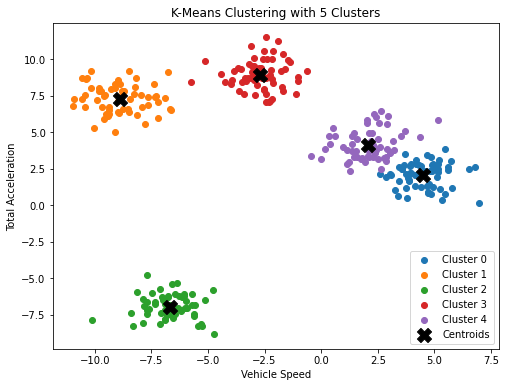

In [11]:
# The first code to have clusters

# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans
# from sklearn.datasets import make_blobs
#
# # Generate sample data (replace this with your dataset)
# X, _ = make_blobs(n_samples=300, centers=5, random_state=42, cluster_std=1.0)
#
# # Create a DataFrame from the generated data
# df = pd.DataFrame(X, columns=['Vehicle Speed', 'Total Acceleration'])
#
# # Perform K-Means clustering with 5 clusters
# num_clusters = 5
# kmeans = KMeans(n_clusters=num_clusters, random_state=42)
# kmeans.fit(df)
#
# # Add the cluster labels to the DataFrame
# df['Cluster'] = kmeans.labels_
#
# # Visualize the clusters
# plt.figure(figsize=(8, 6))
#
# # Plot data points with colors representing clusters
# for cluster_label in range(num_clusters):
#     cluster_data = df[df['Cluster'] == cluster_label]
#     plt.scatter(cluster_data['Vehicle Speed'], cluster_data['Total Acceleration'], label=f'Cluster {cluster_label}')
#
# # Plot cluster centers
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black', marker='X', s=200, label='Centroids')
#
# plt.xlabel('Vehicle Speed')
# plt.ylabel('Total Acceleration')
# plt.title('K-Means Clustering with 5 Clusters')
# plt.legend()
# plt.show()


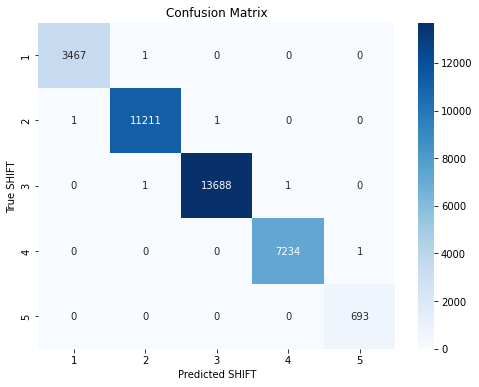

In [12]:
# Code to generate Confusion Matrix

# import pandas as pd
# import seaborn as sns
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import confusion_matrix
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import LabelEncoder
#
# df.dropna(inplace=True)
#
# Convert categorical variables to numerical using LabelEncoder
# label_encoder = LabelEncoder()
# df['SHIFT_encoded'] = label_encoder.fit_transform(df['SHIFT'])
#
# X = df.drop(columns=['SHIFT', 'SHIFT_encoded'])
# y = df['SHIFT_encoded']
#
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#
# # Train a Decision Tree Classifier
# clf = DecisionTreeClassifier(random_state=42)
# clf.fit(X_train, y_train)
#
# # Predict clusters for the test data
# predicted_clusters = clf.predict(X_test)
#
# # Decode the predicted clusters back to original labels
# predicted_shifts = label_encoder.inverse_transform(predicted_clusters)
#
# conf_matrix = confusion_matrix(y_test, predicted_clusters)
#
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
# plt.xlabel('Predicted SHIFT')
# plt.ylabel('True SHIFT')
# plt.title('Confusion Matrix')
# plt.show()
